the best month index is :1
the best month is :2025-02-01 00:00:00
the best month sales is :226
the best product index is :Product_A
the best product value is :870
the best quarter index is :Q1
the best quarter value is :634


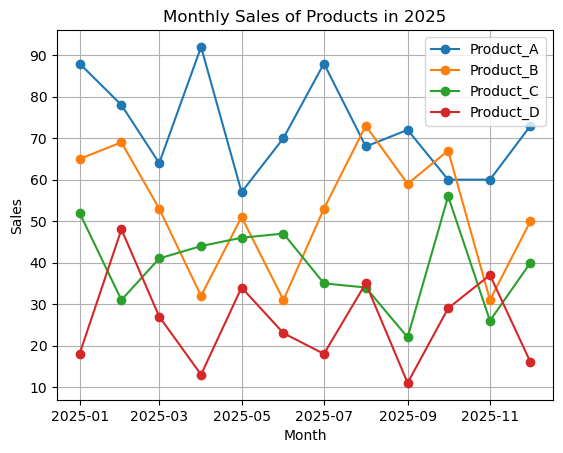

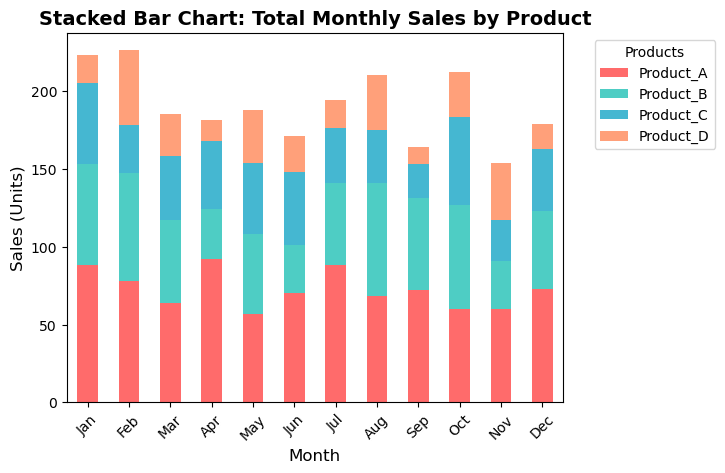

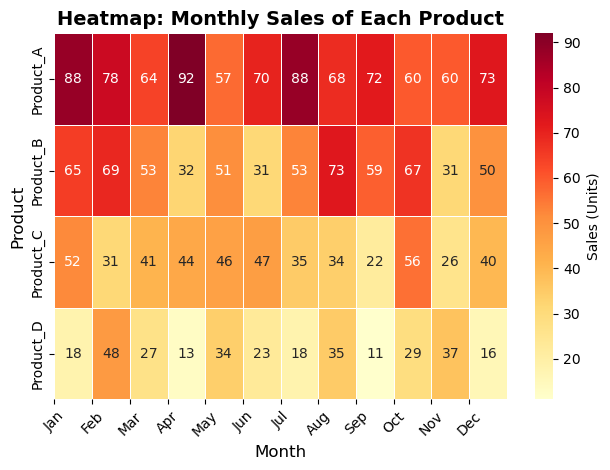

C:\Users\DELL\AppData\Local\Temp\ipykernel_23732\335541368.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


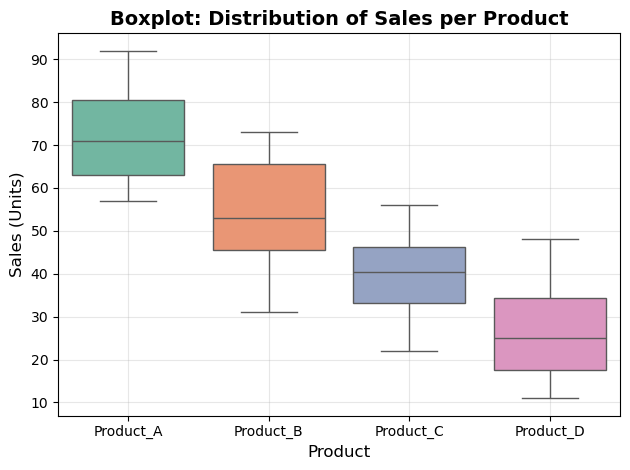

Contribution de chaque produit :
Product_A: 38.0%
Product_B: 27.7%
Product_C: 20.7%
Product_D: 13.5%

Performance par trimestre :
         Total_Sales  Month_over_Month_Growth
Quarter                                      
Q1               634                    -5.60
Q2               540                    -2.45
Q3               568                    -0.07
Q4               545                     6.05


,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Month_over_Month_Growth,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,88,65,52,18,223,55.75,0.000000,Q1,Product_A,Product_D
1,2025-02-01,78,69,31,48,226,56.50,1.345291,Q1,Product_A,Product_C
2,2025-03-01,64,53,41,27,185,46.25,-18.141593,Q1,Product_A,Product_D
3,2025-04-01,92,32,44,13,181,45.25,-2.162162,Q2,Product_A,Product_D
4,2025-05-01,57,51,46,34,188,47.00,3.867403,Q2,Product_A,Product_D
5,2025-06-01,70,31,47,23,171,42.75,-9.042553,Q2,Product_A,Product_D
6,2025-07-01,88,53,35,18,194,48.50,13.450292,Q3,Product_A,Product_D
7,2025-08-01,68,73,34,35,210,52.50,8.247423,Q3,Product_B,Product_C
8,2025-09-01,72,59,22,11,164,41.00,-21.904762,Q3,Product_A,Product_D
9,2025-10-01,60,67,56,29,212,53.00,29.268293,Q4,Product_B,Product_D


In [19]:
import numpy as np
import pandas as pd 
from utils import generate_random_sales #pour connecter la fonction generate_random_sales de le fichier utils donne ce code
import matplotlib.pyplot as plt
import seaborn as sns
#1-Data Generation
np.random.seed(42) 
dates = pd.date_range('2025-01-01','2025-12-01' , freq='MS')#  MS donne le debut de chaque moins
# creation des produits
product_a = generate_random_sales(50, 100, 12) #ici 50 valuer maximum de produit 100 valuer minimum de produit et 12 reprisente les mois
product_b = generate_random_sales(30, 80, 12)#méme chose
product_c = generate_random_sales(20, 60, 12)#méme chose
product_d = generate_random_sales(10, 50, 12)#méme chose
#creation de dataframe 
df = pd.DataFrame({
    'Date': dates,
    'Product_A': product_a,
    'Product_B': product_b,
    'Product_C': product_c,
    'Product_D': product_d
})
df.to_csv('C:/Users/dell/project_sales/data/initial.csv', index=False)# pour sauvgarder le dataframe dans un fichier exel qu'il s'appller intial.csv
df1 = df.copy()
#2-Build dataframe
# Calculer les ventes totales
df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)

# Calculer les ventes moyennes
df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)

# Calculer la croissance mensuelle(Month over Month Growth)
liste_de_croissance=[0]  #0 par ce que le premier mois n'a pas de mois avant lui
for i in range(1 , len(df)):  
    mois_avant=df.loc[i-1,'Total_Sales']
    mois_actuel=df.loc[i,'Total_Sales']
    porsentage=(mois_actuel-mois_avant)/mois_avant*100
    liste_de_croissance.append(porsentage)
df['Month_over_Month_Growth']= liste_de_croissance

def get_quarter(month): # deviser les moins en 4 quartiers
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:  # 10, 11, 12
        return 'Q4'

# Appliquer la fonction à chaque date
df['Quarter'] = df['Date'].dt.month.apply(get_quarter)


product_columns = ['Product_A', 'Product_B', 'Product_C', 'Product_D']

df['Max_Sales_Product'] = df[product_columns].idxmax(axis=1)
df['Min_Sales_Product'] = df[product_columns].idxmin(axis=1)
df.to_csv('C:/Users/DELL/project_sales/data/final.csv', index=False)
#3-Pivot Tables & summaries
pivot_avg = df.pivot_table(
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    index='Quarter',
    aggfunc='mean'
).add_suffix("_Avg")#add_suffix   ici pour chaque colonne des produit de moyenne on le nom par exemple comme ça Product_A_Avg
pivot_avg = pivot_avg.round(2)

pivot_sum = df.pivot_table(
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
    index='Quarter',
    aggfunc='sum'
).add_suffix("_Sum")   #add_suffix   ici pour chaque colonne des produit de somme on le nom par exemple comme ça Product_A_Sum
pivot_total = df.groupby('Quarter')['Total_Sales'].sum()

output = pd.concat([pivot_avg,pivot_sum, pivot_total], axis=1)
output.to_csv("C:/Users/dell/project_sales/data/output.csv", index=True)
#4-Key Insights
#ici il cherche la lien qui contient la plus grande valeur (total_sales) ça vu dir le moi qu'a la plus grande valeur de trois façon index ,nom de mois et valeur total des trois produt pour chaque mois
#donner moi l'index de nombre maximal de la colomn Total_Sales
best_month_idx=df['Total_Sales'].idxmax()
#donner moi le nom de mois de cet index
best_month = df.loc[best_month_idx, 'Date']
#donner moi la valeur de Total_sales apartire de l'index
best_month_sales = df.loc[best_month_idx, 'Total_Sales']
print(f"the best month index is :{best_month_idx}")
print(f"the best month is :{best_month}")
print(f"the best month sales is :{best_month_sales}")
#ici la plus grande valeur par année pour chaque produit la premier des chose on calcule la somme pour chaque produit
annual_totals=df[product_columns].sum()
best_produit_index=annual_totals.idxmax()
best_produit_value=annual_totals.max()
print(f"the best product index is :{best_produit_index}")
print(f"the best product value is :{best_produit_value}")
#best quarter
best_quarter_index=pivot_total.idxmax()
best_quarter_value=pivot_total.max()
print(f"the best quarter index is :{best_quarter_index}")
print(f"the best quarter value is :{best_quarter_value}")
#5-Visualization
for col in product_columns: # pour parcourir tout les produits
    plt.plot(dates, df[col], marker='o', label=col) #df[col] par exemple pour df['produit_A'] pour chaque produit on dissiner le plot

plt.title("Monthly Sales of Products in 2025")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
# Graphique en barres empilées
df.plot(
    x='Date', 
    y=product_columns, 
    kind='bar', 
    stacked=True,
    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
    ax=plt.gca()#utilise l'axe graphique courant
)
plt.title("Stacked Bar Chart: Total Monthly Sales by Product", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales (Units)", fontsize=12)
plt.legend(title="Products", bbox_to_anchor=(1.05, 1), loc='upper left')# bbox_to_anchor:positionne la légende à l'extérieur du graphique et loc='upper left' : aligne la légende en haut à gauche de sa position
plt.xticks(range(len(dates)), [d.strftime('%b') for d in dates], rotation=45)# formate les dates en noms de mois abrégés (Jan, Feb, etc.)
plt.show()
# GRAPHIQUE 3 : Heatmap
heatmap_data = df.set_index('Date')[product_columns].T# Prépare les données pour la heatmap ou les produits deviennent les lignes, les dates deviennent les colonnes
sns.heatmap(
    heatmap_data, 
    annot=True, # Affiche les valeurs numériques dans chaque case
    fmt='d', # 'd' = entier (decimal)
    cmap='YlOrRd',#Palette de couleurs : Yellow-Orange-Red
    cbar_kws={'label': 'Sales (Units)'},# Personnalise la barre de couleur
    linewidths=0.5# Épaisseur des lignes entre les cases
)
plt.title("Heatmap: Monthly Sales of Each Product", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.xticks(range(len(dates)), [d.strftime('%b') for d in dates], rotation=45)
plt.tight_layout()
plt.show()
# GRAPHIQUE 4 : Boxplot
df_melted = df.melt(# Transforme le DataFrame de format "large" à format "long"
    value_vars=product_columns, 
    var_name='Product', 
    value_name='Sales'
)
sns.boxplot(
    data=df_melted, 
    x='Product', 
    y='Sales',
    palette='Set2'#jeu de couleurs prédéfini harmonieux
)
plt.title("Boxplot: Distribution of Sales per Product", fontsize=14, fontweight='bold')
plt.xlabel("Product", fontsize=12)
plt.ylabel("Sales (Units)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
#6-conclusion question 
#1-
# Calcul des ventes totales par produit
annual_totals = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum()
contribution_percentage = (annual_totals / annual_totals.sum()) * 100

print("Contribution de chaque produit :")
for product, percentage in contribution_percentage.items():
    print(f"{product}: {percentage:.1f}%")
print()
#2-
# Analyse par trimestre
quarterly_analysis = df.groupby('Quarter').agg({
    'Total_Sales': 'sum',
    'Month_over_Month_Growth': 'mean'
}).round(2)

print("Performance par trimestre :")
print(quarterly_analysis)

df